In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from bouncingball import *
from util import *
from plots import *

In [14]:
num_seqs = 100
T = 50
K = 4
D = 2
dt = 4
Boundary = 25
noise_ratio = 10.0
pixels = 32
dpi = 200
radius = 2

Ys = np.zeros((num_seqs, T, D))
Zs_true = np.zeros((num_seqs, T, K))
As_true = np.zeros((num_seqs, K, K))
covs_true = np.zeros((num_seqs, K, D, D))
mus_true = np.zeros((num_seqs, K, D))

for n in range(num_seqs):
    STATE, mus, covs, Pi, Y, A, Z = generate_seq(T, K, dt, Boundary, noise_ratio, radius)

    Ys[n] = Y.data.numpy()
    Zs_true[n] = Z.data.numpy()
    As_true[n] = A.data.numpy()
    mus_true[n] = mus.data.numpy()
    covs_true[n] = covs.data.numpy()
    
    
    if n % 100 == 0:
        print(n)
        

0


In [23]:
np.save('ball_dataset/sequences', Ys)
np.save('ball_dataset/transitions', As_true)
np.save('ball_dataset/states', Zs_true)
np.save('ball_dataset/means', mus_true)
np.save('ball_dataset/covariances', covs_true)
np.save('ball_dataset/init', Pi)

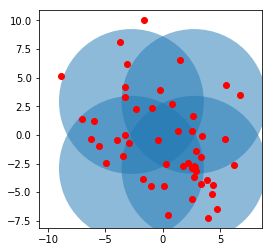

In [21]:
STATE, mus, covs, Pi, Y, A, Z = generate_seq(T, K, dt, Boundary, noise_ratio, 0)
plot_clusters(Y.data.numpy(), mus.data.numpy(), covs.data.numpy(), K)

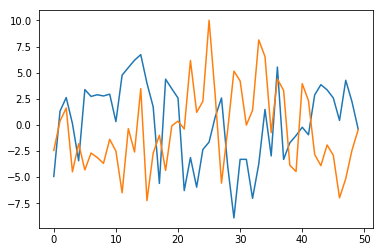

In [22]:
plt.plot(Y.data.numpy())

In [3]:
generate_pixels(T, K, num_seqs, Boundary, dt, noise_ratio, pixels, dpi, radius)

dataset generate completed!
